# 01. Importing Libraries

## Task 3

Import your analysis libraries, as well as your new customer data set as a dataframe.

In [1]:
# Importing libraries:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [2]:
# Creating a shortcut path
path = path = r'C:\Users\henri\Documents\Tonia\Learning\CarrrerFoundry\Data Immersion\Achievement 4\Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\henri\\Documents\\Tonia\\Learning\\CarrrerFoundry\\Data Immersion\\Achievement 4\\Instacart Basket Analysis'

### Importing customers dataset

In [6]:
# Importing customers.csv:
customers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))

In [7]:
# Checking the first 5 rows of the df:
customers.head()

user_id First Name    Surnam  Gender       STATE  Age date_joined  \
0    26711    Deborah  Esquivel  Female    Missouri   48    1/1/2017   
1    33890   Patricia      Hart  Female  New Mexico   36    1/1/2017   
2    65803    Kenneth    Farley    Male       Idaho   35    1/1/2017   
3   125935   Michelle     Hicks  Female        Iowa   40    1/1/2017   
4   130797        Ann   Gilmore  Female    Maryland   26    1/1/2017   

   n_dependants fam_status  income  
0             3    married  165665  
1             0     single   59285  
2             2    married   99568  
3             0     single   42049  
4             1    married   40374

In [8]:
# Dimensions of the dataframe
customers.shape

(206209, 10)

In [11]:
#Information about the dataframe
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   First Name    194950 non-null  object
 2   Surnam        206209 non-null  object
 3   Gender        206209 non-null  object
 4   STATE         206209 non-null  object
 5   Age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


In [12]:
# Checking the data types of customers dataframe's columns
customers.dtypes

user_id          int64
First Name      object
Surnam          object
Gender          object
STATE           object
Age              int64
date_joined     object
n_dependants     int64
fam_status      object
income           int64
dtype: object

In [13]:
# Descriptive statistics of the customers dataframe:
customers.describe()

user_id            Age   n_dependants         income
count  206209.000000  206209.000000  206209.000000  206209.000000
mean   103105.000000      49.501646       1.499823   94632.852548
std     59527.555167      18.480962       1.118433   42473.786988
min         1.000000      18.000000       0.000000   25903.000000
25%     51553.000000      33.000000       0.000000   59874.000000
50%    103105.000000      49.000000       1.000000   93547.000000
75%    154657.000000      66.000000       3.000000  124244.000000
max    206209.000000      81.000000       3.000000  593901.000000

### Importing orders_products dataframe

In [41]:
# Importing orders_products_final.pkl
ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_final.pkl'))

In [42]:
# Checking the first 5 rows of the df:
ords_prods.head()

order_id user_id  order_number  orders_day_of_week  order_hour_of_day  \
0  2539329       1             1                   2                  8   
1  2398795       1             2                   3                  7   
2   473747       1             3                   3                 12   
3  2254736       1             4                   4                  7   
4   431534       1             5                   4                 15   

   days_since_previous_order  product_id  add_to_cart_order  reordered  \
0                        NaN         196                  1          0   
1                       15.0         196                  1          1   
2                       21.0         196                  1          1   
3                       29.0         196                  1          1   
4                       28.0         196                  1          1   

  product_name  ...        price_range     busiest_day    busiest_days  \
0         Soda  ...  Mid-range product  Regularly busy  Regularly busy   
1         Soda  ...  Mid-range product  Regularly busy      Least busy   
2         Soda  ...  Mid-range product  Regularly busy      Least busy   
3         Soda  ...  Mid-range product      Least busy      Least busy   
4         Soda  ...  Mid-range product      Least busy      Least busy   

  busiest_period_of_day max_order  loyalty_flag mean_spend  spending_flag  \
0        Average orders        10  New customer   6.367797    Low spender   
1        Average orders        10  New customer   6.367797    Low spender   
2           Most orders        10  New customer   6.367797    Low spender   
3        Average orders        10  New customer   6.367797    Low spender   
4           Most orders        10  New customer   6.367797    Low spender   

  median_order_frequency         frequency_flag  
0                   20.5  Non-frequent customer  
1                   20.5  Non-frequent customer  
2                   20.5  Non-frequent customer  
3                   20.5  Non-frequent customer  
4                   20.5  Non-frequent customer  

[5 rows x 23 columns]

In [43]:
# Dimensions of the dataframe
ords_prods.shape

(32404859, 23)

In [44]:
# Checking the data types of ords_prods dataframe's columns
ords_prods.dtypes

order_id                      object
user_id                       object
order_number                   int64
orders_day_of_week             int64
order_hour_of_day              int64
days_since_previous_order    float64
product_id                     int64
add_to_cart_order              int64
reordered                      int64
product_name                  object
aisle_id                       int64
department_id                  int64
prices                       float64
price_range                   object
busiest_day                   object
busiest_days                  object
busiest_period_of_day         object
max_order                      int64
loyalty_flag                  object
mean_spend                   float64
spending_flag                 object
median_order_frequency       float64
frequency_flag                object
dtype: object

# 03. Data Wrangling

## Task 4

Wrangle the data so that it follows consistent logic; for example, rename columns with illogical names and drop columns that don’t add anything to your analysis.

### 03.1 Renaming columns

The following columns have illogical or not well-formatted names, which should be adjusted:

    First Name 
    Surnam
    Gender
    STATE
    Age
    n_dependants
    fam_status

In [14]:
# Renaming "First Name" column in customers dataframe
customers.rename(columns = {'First Name' : 'first_name'}, inplace = True)

In [16]:
# Renaming "Surnam" column in customers dataframe
customers.rename(columns = {'Surnam' : 'surname'}, inplace = True)

In [21]:
# Renaming "Gender" column in customers dataframe
customers.rename(columns = {'Gender' : 'gender'}, inplace = True)

In [17]:
# Renaming "STATE" column in customers dataframe
customers.rename(columns = {'STATE' : 'state'}, inplace = True)

In [23]:
# Renaming "Age" column in customers dataframe
customers.rename(columns = {'Age' : 'age'}, inplace = True)

In [18]:
# Renaming "n_dependants" column in customers dataframe
customers.rename(columns = {'n_dependants' : 'number_of_dependants'}, inplace = True)

In [19]:
# Renaming "fam_status" column in customers dataframe
customers.rename(columns = {'fam_status' : 'family_status'}, inplace = True)

In [24]:
# Check:
customers.head()

user_id first_name   surname  gender       state  age date_joined  \
0    26711    Deborah  Esquivel  Female    Missouri   48    1/1/2017   
1    33890   Patricia      Hart  Female  New Mexico   36    1/1/2017   
2    65803    Kenneth    Farley    Male       Idaho   35    1/1/2017   
3   125935   Michelle     Hicks  Female        Iowa   40    1/1/2017   
4   130797        Ann   Gilmore  Female    Maryland   26    1/1/2017   

   number_of_dependants family_status  income  
0                     3       married  165665  
1                     0        single   59285  
2                     2       married   99568  
3                     0        single   42049  
4                     1       married   40374

### 03.2 Deleting columns

There are no obvious columns to delete. However, I would like to check the frequency of the "date_joined" column. If all the dates are the same, there is no reason to keep the column. However, it might be just a coincidence that the first five rows have the same date.

In [25]:
# Checking the frequency of the "date_joined" column:
customers['date_joined'].value_counts(dropna = False)

9/17/2018     213
2/10/2018     212
4/1/2019      211
9/21/2019     211
12/19/2017    210
             ... 
9/1/2018      141
1/22/2018     140
11/24/2017    139
7/18/2019     138
8/6/2018      128
Name: date_joined, Length: 1187, dtype: int64

The dates vary, so there the column should be kept as is.

# 04. Data quality and consistency checks

## Task 5

Complete the fundamental data quality and consistency checks you’ve learned throughout this Achievement; for example, check for and address missing values and duplicates, and convert any mixed-type data.

### 04.1 Mixed-type data

In [26]:
# Check for mixed type data
for col in customers.columns.tolist():
  weird = (customers[[col]].applymap(type) != customers[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (customers[weird]) > 0:
    print (col)

first_name


In [27]:
# Checking the frequency of the "first_name" column:
customers['first_name'].value_counts(dropna = False)

NaN        11259
Marilyn     2213
Barbara     2154
Todd        2113
Jeremy      2104
           ...  
Merry        197
Eugene       197
Garry        191
Ned          186
David        186
Name: first_name, Length: 208, dtype: int64

In [28]:
customers.dtypes

user_id                  int64
first_name              object
surname                 object
gender                  object
state                   object
age                      int64
date_joined             object
number_of_dependants     int64
family_status           object
income                   int64
dtype: object

Even though our check shows that there is a mixed-type data in the "first_name" column, the datatype is object (string), which is correct for the first name. However, we discovered that there are 11259 missing values, which should be checked and addressed.

### 04.2 Missing Values

In [29]:
# Checking how many null values there are in the customers df
customers.isnull().sum()

user_id                     0
first_name              11259
surname                     0
gender                      0
state                       0
age                         0
date_joined                 0
number_of_dependants        0
family_status               0
income                      0
dtype: int64

As expected from the previous check, there are 11259 missing values in the "first_name" column. As it is possible for the customer to go only by surname, this should not be removed. However, let's have a closer look at the records with these values.

In [30]:
# Creating a subset df of null values from "first_name" column from customers df
df_nan = customers[customers['first_name'].isnull() == True]

In [31]:
df_nan

user_id first_name   surname  gender         state  age date_joined  \
53        76659        NaN   Gilbert    Male      Colorado   26    1/1/2017   
73        13738        NaN     Frost  Female     Louisiana   39    1/1/2017   
82        89996        NaN    Dawson  Female        Oregon   52    1/1/2017   
99        96166        NaN   Oconnor    Male      Oklahoma   51    1/1/2017   
105       29778        NaN    Dawson  Female          Utah   63    1/1/2017   
...         ...        ...       ...     ...           ...  ...         ...   
206038   121317        NaN    Melton    Male  Pennsylvania   28   3/31/2020   
206044   200799        NaN  Copeland  Female        Hawaii   52    4/1/2020   
206090   167394        NaN     Frost  Female        Hawaii   61    4/1/2020   
206162   187532        NaN     Floyd  Female    California   39    4/1/2020   
206171   116898        NaN   Delgado  Female      Colorado   23    4/1/2020   

        number_of_dependants family_status  income  
53                         2       married   41709  
73                         0        single   82518  
82                         3       married  117099  
99                         1       married  155673  
105                        3       married  151819  
...                      ...           ...     ...  
206038                     3       married   87783  
206044                     2       married  108488  
206090                     1       married   45275  
206162                     0        single   56325  
206171                     2       married   59222  

[11259 rows x 10 columns]

For the sake of our analysis, I will leave the null values. However, in reality, it would be wise to check with the client why there are so many null values in the first_name column. Maybe there is a change needed in their system to make this input mandatory while creating an account on the site.

### 04.3. Duplicates

In [32]:
# Creating a subset of duplicated rows from customers df
df_dups = customers[customers.duplicated()]

In [33]:
df_dups

Empty DataFrame
Columns: [user_id, first_name, surname, gender, state, age, date_joined, number_of_dependants, family_status, income]
Index: []

There are no duplicates in the customer dataframe.

### 04.4. Changing data types

User_id type should be changed to a string, as this is not a numerical, but categorical value.

In [45]:
# Convert "user_id" column's data type to string
customers['user_id'] = customers['user_id'].astype('str')

In [47]:
# Checking the data types of customers df
customers.dtypes

user_id                 object
first_name              object
surname                 object
gender                  object
state                   object
age                      int64
date_joined             object
number_of_dependants     int64
family_status           object
income                   int64
dtype: object

# 05. Descriptive Statistics

In [48]:
# Descriptive statistivs of the customers df
customers.describe()

age  number_of_dependants         income
count  206209.000000         206209.000000  206209.000000
mean       49.501646              1.499823   94632.852548
std        18.480962              1.118433   42473.786988
min        18.000000              0.000000   25903.000000
25%        33.000000              0.000000   59874.000000
50%        49.000000              1.000000   93547.000000
75%        66.000000              3.000000  124244.000000
max        81.000000              3.000000  593901.000000

The age values are between 18 and 81, which looks normal, with the mean of 49.5 years.

The number of dependants looks also normal, ranging from 0 to 3, with an average of 1.5.

The income of the customers is between 25'903 and 593'901, with a average of 94'632.9.

From the above analysis, we might have some outliers in the income column, which I will check now.

#### Checking potential outliers in the income column

<Axes: ylabel='Frequency'>

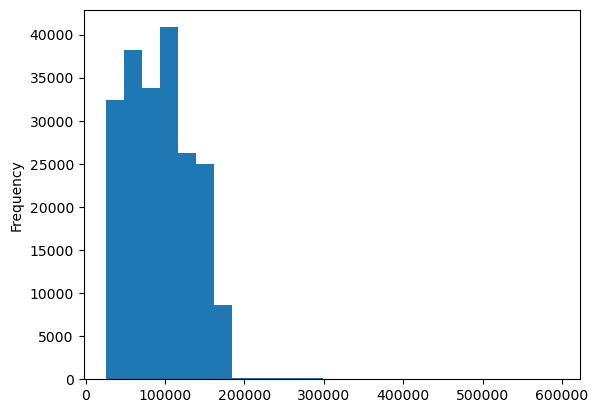

In [35]:
# Creating a histogram of the "income" column:
customers['income'].plot.hist(bins = 25)

In [36]:
customers['income'].median()

93547.0

In [37]:
customers['income'].mean()

94632.85254765795

<Axes: xlabel='income', ylabel='income'>

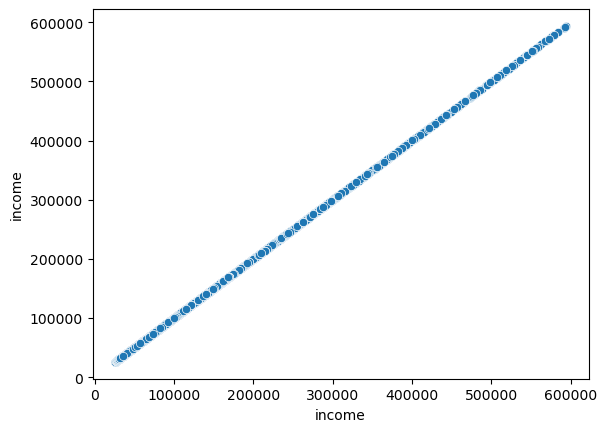

In [38]:
# Creating scatterplot to see the outliers:
sns.scatterplot(x = 'income', y = 'income', data = customers)

<Axes: ylabel='Frequency'>

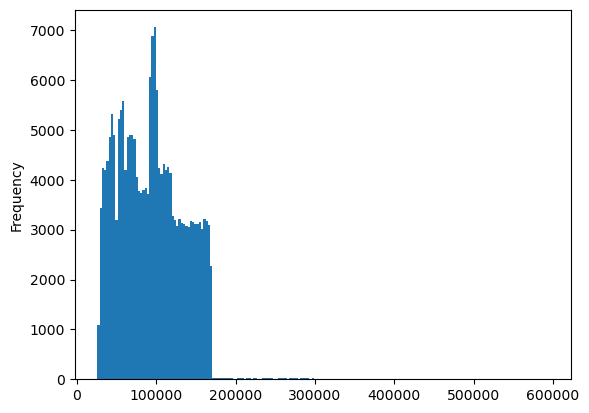

In [40]:
# Creating another histogram of the "income" column:
customers['income'].plot.hist(bins = 200)

Even though at first sight it might appear that the income column has outliers, after creating a scatterplot we see that the data is right skewed, but doesn't have single outliers, which should be eliminated.

# 06. Combining dataframes

## Task 6

Combine your customer data with the rest of your prepared Instacart data. (Hint: Make sure the key columns are the same data type!)

The customers and orders_products dataframe can be combined by merging the dataframes on "user_id".

In [49]:
# Creating a new dataframe, instacart_df
instacart_df = ords_prods.merge(customers, on = 'user_id', indicator = True)

In [50]:
# First five rows of newly merged dataframe
instacart_df.head()

order_id user_id  order_number  orders_day_of_week  order_hour_of_day  \
0  2539329       1             1                   2                  8   
1  2398795       1             2                   3                  7   
2   473747       1             3                   3                 12   
3  2254736       1             4                   4                  7   
4   431534       1             5                   4                 15   

   days_since_previous_order  product_id  add_to_cart_order  reordered  \
0                        NaN         196                  1          0   
1                       15.0         196                  1          1   
2                       21.0         196                  1          1   
3                       29.0         196                  1          1   
4                       28.0         196                  1          1   

  product_name  ...  first_name  surname  gender    state age date_joined  \
0         Soda  ...       Linda   Nguyen  Female  Alabama  31   2/17/2019   
1         Soda  ...       Linda   Nguyen  Female  Alabama  31   2/17/2019   
2         Soda  ...       Linda   Nguyen  Female  Alabama  31   2/17/2019   
3         Soda  ...       Linda   Nguyen  Female  Alabama  31   2/17/2019   
4         Soda  ...       Linda   Nguyen  Female  Alabama  31   2/17/2019   

  number_of_dependants  family_status income  _merge  
0                    3        married  40423    both  
1                    3        married  40423    both  
2                    3        married  40423    both  
3                    3        married  40423    both  
4                    3        married  40423    both  

[5 rows x 33 columns]

In [51]:
# Shape of the new dataframe
instacart_df.shape

(32404859, 33)

In [52]:
# Check to see if we have a full match or not
instacart_df['_merge'].value_counts()

both          32404859
left_only            0
right_only           0
Name: _merge, dtype: int64

Note: the resulting dataframe (after the merge) has 32,404,859 rows, and each of those rows have information found in both input data sets.

# 07. Exporting data

## Task 8

Export this new dataframe as a pickle file so you can continue to use it in the second part of this task.

In [53]:
# Exporting merged dataframe to pickle
instacart_df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart.pkl'))